# Llama3 as Expert Evaluator
Comparing BART vs BART fine-tuned models

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#instantiate a dataframe for the "bart vs. bart fine_tuned" analysis (df_bart)
df_bart=pd.read_csv('data/llm_evaluator_bart_vs_bart_fine_tune_checkpoint.csv')
df_bart.head(5)

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,article,highlights,id,t5_summaries,t5_fine_tuned_summaries,bart_summaries,bart_fine_tuned_summaries,pegasus_summaries,llm_summary,bart_vs_finetune_order_1_results,bart_vs_finetune_order_2_results,bart_vs_finetune_order_3_results,bart_vs_finetune_order_4_results,bart_vs_finetune_order_5_results,bart_vs_finetune_order_6_results
0,0,0,0,0,0,manchester united have fallen off their perch....,manchester united were beaten 2-0 in their cha...,5b3a626078390cb0e05327b4019753fd11cb8cea,manchester united lost 1-0 to olympiacos in th...,manchester united lost 1-0 to olympiacos in th...,manchester united have fallen off their perch....,manchester united have fallen off their perch....,whether we are talking about the events of wed...,The article discusses Manchester United's rece...,bart_fine_tuned,bart,NaN,bart,bart_fine_tuned,bart
1,1,1,1,1,1,a mother whose russian husband snatched their ...,"rachael neustadt's sons - daniel, eight and jo...",59d478d4a4299e2192997e56a9db9003fa2bac2d,"rachael neustadt's sons daniel, eight, and jon...","rachael neustadt's sons daniel, eight, and jon...",a mother whose russian husband snatched their ...,rachael neustadt and her two sons were freed i...,a mother whose russian husband snatched their ...,Rachel Neustadt's Russian husband Ilya kidnapp...,bart,bart,bart,bart,bart,NaN
2,2,2,2,2,2,claim: supporters of mayor lutfur rahman alleg...,islamic voters allegedly told to be 'good musl...,ec961b7d0912e7753dffe4360b77481eba96f2e1,supporters of mayor lutfur rahman allegedly ha...,supporters of mayor lutfur rahman allegedly ha...,claim: supporters of mayor lutfur rahman alleg...,claim: supporters of mayor lutfur rahman hande...,a petition brought before the high court claim...,A petition has been brought before the High Co...,bart_fine_tuned,bart,bart_fine_tuned,bart,bart_fine_tuned,bart
3,3,3,3,3,3,the 15-year-old cousin of a palestinian boy wh...,"mohammed abu khder, 16, abducted and burned to...",092d90d61eb105b3955820cc4894ac2c4995ad1b,"mohammed abu khder, 16, was abducted from his ...","mohammed abu khder, 16, was burned to death in...",the 15-year-old cousin of a palestinian boy wh...,cousin of palestinian boy burned to death in i...,the 15-year-old cousin of a palestinian boy wh...,"Mohammed Abu Khder, a 16-year-old Palestinian,...",bart_fine_tuned,bart,bart_fine_tuned,bart,bart_fine_tuned,bart
4,4,4,4,4,4,it may have made its way up the pole to become...,spearmint rhino records £2.1m loss in 2011 .lo...,d0d59018cdf48aaeb6e1838c0323f8555e800765,spearmint rhino has recorded a loss of £2.1mil...,spearmint rhino has recorded a loss of £2.1m i...,it may have made its way up the pole to become...,spearmint rhino has filed accounts showing tha...,"despite the losses, spearmint rhino says it ha...","Spearmint Rhino, a British chain of lap dancin...",bart_fine_tuned,bart_fine_tuned,bart_fine_tuned,bart_fine_tuned,bart_fine_tuned,bart


In [3]:
df_bart.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'Unnamed: 0', 'article', 'highlights', 'id', 't5_summaries',
       't5_fine_tuned_summaries', 'bart_summaries',
       'bart_fine_tuned_summaries', 'pegasus_summaries', 'llm_summary',
       'bart_vs_finetune_order_1_results', 'bart_vs_finetune_order_2_results',
       'bart_vs_finetune_order_3_results', 'bart_vs_finetune_order_4_results',
       'bart_vs_finetune_order_5_results', 'bart_vs_finetune_order_6_results'],
      dtype='object')

In [4]:
cols_to_compare = ['bart_vs_finetune_order_1_results', 'bart_vs_finetune_order_2_results',
       'bart_vs_finetune_order_3_results', 'bart_vs_finetune_order_4_results',
       'bart_vs_finetune_order_5_results', 'bart_vs_finetune_order_6_results']

In [5]:
row_modes = df_bart[cols_to_compare].mode(axis=1)
row_modes.tail(20)

,0,1
180,bart,bart_fine_tuned
181,bart,NaN
182,bart,NaN
183,bart,NaN
184,bart,bart_fine_tuned
185,bart,bart_fine_tuned
186,bart,NaN
187,bart,bart_fine_tuned
188,bart,NaN
189,bart,NaN


In [6]:
df_bart.tail()

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,article,highlights,id,t5_summaries,t5_fine_tuned_summaries,bart_summaries,bart_fine_tuned_summaries,pegasus_summaries,llm_summary,bart_vs_finetune_order_1_results,bart_vs_finetune_order_2_results,bart_vs_finetune_order_3_results,bart_vs_finetune_order_4_results,bart_vs_finetune_order_5_results,bart_vs_finetune_order_6_results
195,195,195,195,195,195,reality tv show the block has been accused of ...,'the block' caught out faking a visit from the...,985b1bf7fc710e4ffdd9dd02e72d889a7997e89d,reality tv show the block has been accused of ...,reality tv show the block has been accused of ...,reality tv show the block has been accused of ...,reality tv show the block has been accused of ...,the show says it was a case of 'misidentificat...,"The reality TV show ""The Block"" has been accus...",bart_fine_tuned,bart,bart_fine_tuned,bart,bart_fine_tuned,bart
196,196,196,196,196,196,the average cost of raising a child to seconda...,average cost of raising a child from birth up ...,e466296e19d7a14cf4916d70a2cbc296e4659c99,average cost of raising a child to secondary s...,average cost of raising a child to secondary s...,the average cost of raising a child to seconda...,the average cost of raising a child to seconda...,"the bulk of the total £83,627-a-year bill come...",According to a recent survey conducted by Hali...,bart,bart,bart,bart,bart_fine_tuned,bart
197,197,197,197,197,197,thai police investigating the murder of two br...,"pornprasit sukdam claims he was offered £13,30...",a07624a84fe59a3321e83f153d6fd615207a8545,"pornprasit sukdam claims he was offered 700,00...","pornprasit sukdam claims he was offered 700,00...",thai police investigating the murder of two br...,thai police investigating the murder of two br...,a spokesman for the royal thai police confirme...,Thai police are investigating the murder of tw...,bart,bart,bart,bart,bart,bart
198,198,198,198,198,198,from clumpy flat shoes that seem to shorten a ...,clumpy flat shoes that seem to shorten a woman...,e16474b52bbf45f49434fc4a0b1d68e2d3fba3c3,kim carillo says she feels surprisingly sexy i...,"kim carillo, who usually favours a more alluri...",from clumpy flat shoes that seem to shorten a ...,kim carillo tests some of the latest man-repel...,"here, kim carillo, who usually favours a more ...","The article discusses the current trend of ""ma...",bart,bart,bart_fine_tuned,bart,bart_fine_tuned,bart
199,199,199,199,199,199,"for most people, a trip to the shops involves ...",moose spent seven hours dashing through the fi...,6f4bbcea20c6d6132b5d987912e06b5f6099a6ea,runaway elk caught dashing through streets of ...,runaway elk caught dashing through streets of ...,"for most people, a trip to the shops involves ...",two moose captured dashing through the streets...,moose on the loose: a runaway elk was captured...,"A moose was seen wandering through Helsinki, F...",bart_fine_tuned,bart_fine_tuned,bart_fine_tuned,bart_fine_tuned,bart_fine_tuned,bart


In [7]:
df_bart = pd.concat([df_bart,row_modes], axis=1)

df_bart

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,article,highlights,id,t5_summaries,t5_fine_tuned_summaries,...,pegasus_summaries,llm_summary,bart_vs_finetune_order_1_results,bart_vs_finetune_order_2_results,bart_vs_finetune_order_3_results,bart_vs_finetune_order_4_results,bart_vs_finetune_order_5_results,bart_vs_finetune_order_6_results,0,1
0,0,0,0,0,0,manchester united have fallen off their perch....,manchester united were beaten 2-0 in their cha...,5b3a626078390cb0e05327b4019753fd11cb8cea,manchester united lost 1-0 to olympiacos in th...,manchester united lost 1-0 to olympiacos in th...,...,whether we are talking about the events of wed...,The article discusses Manchester United's rece...,bart_fine_tuned,bart,NaN,bart,bart_fine_tuned,bart,bart,NaN
1,1,1,1,1,1,a mother whose russian husband snatched their ...,"rachael neustadt's sons - daniel, eight and jo...",59d478d4a4299e2192997e56a9db9003fa2bac2d,"rachael neustadt's sons daniel, eight, and jon...","rachael neustadt's sons daniel, eight, and jon...",...,a mother whose russian husband snatched their ...,Rachel Neustadt's Russian husband Ilya kidnapp...,bart,bart,bart,bart,bart,NaN,bart,NaN
2,2,2,2,2,2,claim: supporters of mayor lutfur rahman alleg...,islamic voters allegedly told to be 'good musl...,ec961b7d0912e7753dffe4360b77481eba96f2e1,supporters of mayor lutfur rahman allegedly ha...,supporters of mayor lutfur rahman allegedly ha...,...,a petition brought before the high court claim...,A petition has been brought before the High Co...,bart_fine_tuned,bart,bart_fine_tuned,bart,bart_fine_tuned,bart,bart,bart_fine_tuned
3,3,3,3,3,3,the 15-year-old cousin of a palestinian boy wh...,"mohammed abu khder, 16, abducted and burned to...",092d90d61eb105b3955820cc4894ac2c4995ad1b,"mohammed abu khder, 16, was abducted from his ...","mohammed abu khder, 16, was burned to death in...",...,the 15-year-old cousin of a palestinian boy wh...,"Mohammed Abu Khder, a 16-year-old Palestinian,...",bart_fine_tuned,bart,bart_fine_tuned,bart,bart_fine_tuned,bart,bart,bart_fine_tuned
4,4,4,4,4,4,it may have made its way up the pole to become...,spearmint rhino records £2.1m loss in 2011 .lo...,d0d59018cdf48aaeb6e1838c0323f8555e800765,spearmint rhino has recorded a loss of £2.1mil...,spearmint rhino has recorded a loss of £2.1m i...,...,"despite the losses, spearmint rhino says it ha...","Spearmint Rhino, a British chain of lap dancin...",bart_fine_tuned,bart_fine_tuned,bart_fine_tuned,bart_fine_tuned,bart_fine_tuned,bart,bart_fine_tuned,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,195,195,195,reality tv show the block has been accused of ...,'the block' caught out faking a visit from the...,985b1bf7fc710e4ffdd9dd02e72d889a7997e89d,reality tv show the block has been accused of ...,reality tv show the block has been accused of ...,...,the show says it was a case of 'misidentificat...,"The reality TV show ""The Block"" has been accus...",bart_fine_tuned,bart,bart_fine_tuned,bart,bart_fine_tuned,bart,bart,bart_fine_tuned
196,196,196,196,196,196,the average cost of raising a child to seconda...,average cost of raising a child from birth up ...,e466296e19d7a14cf4916d70a2cbc296e4659c99,average cost of raising a child to secondary s...,average cost of raising a child to secondary s...,...,"the bulk of the total £83,627-a-year bill come...",According to a recent survey conducted by Hali...,bart,bart,bart,bart,bart_fine_tuned,bart,bart,NaN
197,197,197,197,197,197,thai police investigating the murder of two br...,"pornprasit sukdam claims he was offered £13,30...",a07624a84fe59a3321e83f153d6fd615207a8545,"pornprasit sukdam claims he was offered 700,00...","pornprasit sukdam claims he was offered 700,00...",...,a spokesman for the royal thai police confirme...,Thai police are investigating the murder of tw...,bart,bart,bart,bart,bart,bart,bart,NaN
198,198,198,198,198,198,from clumpy flat shoes that seem to shorten a ...,clumpy flat s

In [8]:
df_bart.rename(columns={0: 'mode_0', 1: 'mode_1'}, inplace=True)
df_bart

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,article,highlights,id,t5_summaries,t5_fine_tuned_summaries,...,pegasus_summaries,llm_summary,bart_vs_finetune_order_1_results,bart_vs_finetune_order_2_results,bart_vs_finetune_order_3_results,bart_vs_finetune_order_4_results,bart_vs_finetune_order_5_results,bart_vs_finetune_order_6_results,mode_0,mode_1
0,0,0,0,0,0,manchester united have fallen off their perch....,manchester united were beaten 2-0 in their cha...,5b3a626078390cb0e05327b4019753fd11cb8cea,manchester united lost 1-0 to olympiacos in th...,manchester united lost 1-0 to olympiacos in th...,...,whether we are talking about the events of wed...,The article discusses Manchester United's rece...,bart_fine_tuned,bart,NaN,bart,bart_fine_tuned,bart,bart,NaN
1,1,1,1,1,1,a mother whose russian husband snatched their ...,"rachael neustadt's sons - daniel, eight and jo...",59d478d4a4299e2192997e56a9db9003fa2bac2d,"rachael neustadt's sons daniel, eight, and jon...","rachael neustadt's sons daniel, eight, and jon...",...,a mother whose russian husband snatched their ...,Rachel Neustadt's Russian husband Ilya kidnapp...,bart,bart,bart,bart,bart,NaN,bart,NaN
2,2,2,2,2,2,claim: supporters of mayor lutfur rahman alleg...,islamic voters allegedly told to be 'good musl...,ec961b7d0912e7753dffe4360b77481eba96f2e1,supporters of mayor lutfur rahman allegedly ha...,supporters of mayor lutfur rahman allegedly ha...,...,a petition brought before the high court claim...,A petition has been brought before the High Co...,bart_fine_tuned,bart,bart_fine_tuned,bart,bart_fine_tuned,bart,bart,bart_fine_tuned
3,3,3,3,3,3,the 15-year-old cousin of a palestinian boy wh...,"mohammed abu khder, 16, abducted and burned to...",092d90d61eb105b3955820cc4894ac2c4995ad1b,"mohammed abu khder, 16, was abducted from his ...","mohammed abu khder, 16, was burned to death in...",...,the 15-year-old cousin of a palestinian boy wh...,"Mohammed Abu Khder, a 16-year-old Palestinian,...",bart_fine_tuned,bart,bart_fine_tuned,bart,bart_fine_tuned,bart,bart,bart_fine_tuned
4,4,4,4,4,4,it may have made its way up the pole to become...,spearmint rhino records £2.1m loss in 2011 .lo...,d0d59018cdf48aaeb6e1838c0323f8555e800765,spearmint rhino has recorded a loss of £2.1mil...,spearmint rhino has recorded a loss of £2.1m i...,...,"despite the losses, spearmint rhino says it ha...","Spearmint Rhino, a British chain of lap dancin...",bart_fine_tuned,bart_fine_tuned,bart_fine_tuned,bart_fine_tuned,bart_fine_tuned,bart,bart_fine_tuned,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,195,195,195,reality tv show the block has been accused of ...,'the block' caught out faking a visit from the...,985b1bf7fc710e4ffdd9dd02e72d889a7997e89d,reality tv show the block has been accused of ...,reality tv show the block has been accused of ...,...,the show says it was a case of 'misidentificat...,"The reality TV show ""The Block"" has been accus...",bart_fine_tuned,bart,bart_fine_tuned,bart,bart_fine_tuned,bart,bart,bart_fine_tuned
196,196,196,196,196,196,the average cost of raising a child to seconda...,average cost of raising a child from birth up ...,e466296e19d7a14cf4916d70a2cbc296e4659c99,average cost of raising a child to secondary s...,average cost of raising a child to secondary s...,...,"the bulk of the total £83,627-a-year bill come...",According to a recent survey conducted by Hali...,bart,bart,bart,bart,bart_fine_tuned,bart,bart,NaN
197,197,197,197,197,197,thai police investigating the murder of two br...,"pornprasit sukdam claims he was offered £13,30...",a07624a84fe59a3321e83f153d6fd615207a8545,"pornprasit sukdam claims he was offered 700,00...","pornprasit sukdam claims he was offered 700,00...",...,a spokesman for the royal thai police confirme...,Thai police are investigating the murder of tw...,bart,bart,bart,bart,bart,bart,bart,NaN
198,198,198,198,198,198,from clumpy flat shoes that seem to shorten a ...,clu

In [9]:
df_bart['winner'] = np.where(df_bart['mode_1'].isna(), df_bart['mode_0'], 'none')
df_bart

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,article,highlights,id,t5_summaries,t5_fine_tuned_summaries,...,llm_summary,bart_vs_finetune_order_1_results,bart_vs_finetune_order_2_results,bart_vs_finetune_order_3_results,bart_vs_finetune_order_4_results,bart_vs_finetune_order_5_results,bart_vs_finetune_order_6_results,mode_0,mode_1,winner
0,0,0,0,0,0,manchester united have fallen off their perch....,manchester united were beaten 2-0 in their cha...,5b3a626078390cb0e05327b4019753fd11cb8cea,manchester united lost 1-0 to olympiacos in th...,manchester united lost 1-0 to olympiacos in th...,...,The article discusses Manchester United's rece...,bart_fine_tuned,bart,NaN,bart,bart_fine_tuned,bart,bart,NaN,bart
1,1,1,1,1,1,a mother whose russian husband snatched their ...,"rachael neustadt's sons - daniel, eight and jo...",59d478d4a4299e2192997e56a9db9003fa2bac2d,"rachael neustadt's sons daniel, eight, and jon...","rachael neustadt's sons daniel, eight, and jon...",...,Rachel Neustadt's Russian husband Ilya kidnapp...,bart,bart,bart,bart,bart,NaN,bart,NaN,bart
2,2,2,2,2,2,claim: supporters of mayor lutfur rahman alleg...,islamic voters allegedly told to be 'good musl...,ec961b7d0912e7753dffe4360b77481eba96f2e1,supporters of mayor lutfur rahman allegedly ha...,supporters of mayor lutfur rahman allegedly ha...,...,A petition has been brought before the High Co...,bart_fine_tuned,bart,bart_fine_tuned,bart,bart_fine_tuned,bart,bart,bart_fine_tuned,none
3,3,3,3,3,3,the 15-year-old cousin of a palestinian boy wh...,"mohammed abu khder, 16, abducted and burned to...",092d90d61eb105b3955820cc4894ac2c4995ad1b,"mohammed abu khder, 16, was abducted from his ...","mohammed abu khder, 16, was burned to death in...",...,"Mohammed Abu Khder, a 16-year-old Palestinian,...",bart_fine_tuned,bart,bart_fine_tuned,bart,bart_fine_tuned,bart,bart,bart_fine_tuned,none
4,4,4,4,4,4,it may have made its way up the pole to become...,spearmint rhino records £2.1m loss in 2011 .lo...,d0d59018cdf48aaeb6e1838c0323f8555e800765,spearmint rhino has recorded a loss of £2.1mil...,spearmint rhino has recorded a loss of £2.1m i...,...,"Spearmint Rhino, a British chain of lap dancin...",bart_fine_tuned,bart_fine_tuned,bart_fine_tuned,bart_fine_tuned,bart_fine_tuned,bart,bart_fine_tuned,NaN,bart_fine_tuned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,195,195,195,reality tv show the block has been accused of ...,'the block' caught out faking a visit from the...,985b1bf7fc710e4ffdd9dd02e72d889a7997e89d,reality tv show the block has been accused of ...,reality tv show the block has been accused of ...,...,"The reality TV show ""The Block"" has been accus...",bart_fine_tuned,bart,bart_fine_tuned,bart,bart_fine_tuned,bart,bart,bart_fine_tuned,none
196,196,196,196,196,196,the average cost of raising a child to seconda...,average cost of raising a child from birth up ...,e466296e19d7a14cf4916d70a2cbc296e4659c99,average cost of raising a child to secondary s...,average cost of raising a child to secondary s...,...,According to a recent survey conducted by Hali...,bart,bart,bart,bart,bart_fine_tuned,bart,bart,NaN,bart
197,197,197,197,197,197,thai police investigating the murder of two br...,"pornprasit sukdam claims he was offered £13,30...",a07624a84fe59a3321e83f153d6fd615207a8545,"pornprasit sukdam claims he was offered 700,00...","pornprasit sukdam claims he was offered 700,00...",...,Thai police are investigating the murder of tw...,bart,bart,bart,bart,bart,bart,bart,NaN,bart
198,198,198,198,198,198,from clumpy flat shoes that seem to shorten a ...,clumpy flat shoes that seem to shorten a woman...,e16474b52bbf45f49434fc4a0b1d68e2d3fba3c3,kim carillo says she feels surprisingly sexy i...,"kim carillo, who usually favours a more alluri...",...,"The article discusses the current trend of ""ma...",bart,bart,bart_fine_tuned,bart,bart_fine_tuned,bart,bart,NaN,bart


In [10]:
(df_bart
 ['winner']
 .value_counts()
)

winner
bart               95
bart_fine_tuned    59
none               46
Name: count, dtype: int64

In [11]:
#Build new dataframe to show results of voting
data = {'model': ['bart', 'bart_fine_tuned', 'no_winner'],
        'value': [95,59,46]}

df_bart_results = pd.DataFrame(data)
df_bart_results

,model,value
0,bart,95
1,bart_fine_tuned,59
2,no_winner,46


In [12]:
95+59+46


200

/tmp/ipykernel_2488497/1956349787.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bart_results,y=df_bart_results['model'],x=df_bart_results['value'], palette = colors,width=0.4, dodge=False)
/tmp/ipykernel_2488497/1956349787.py:13: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_bart_results,y=df_bart_results['model'],x=df_bart_results['value'], palette = colors,width=0.4, dodge=False)


<Figure size 1600x800 with 0 Axes>

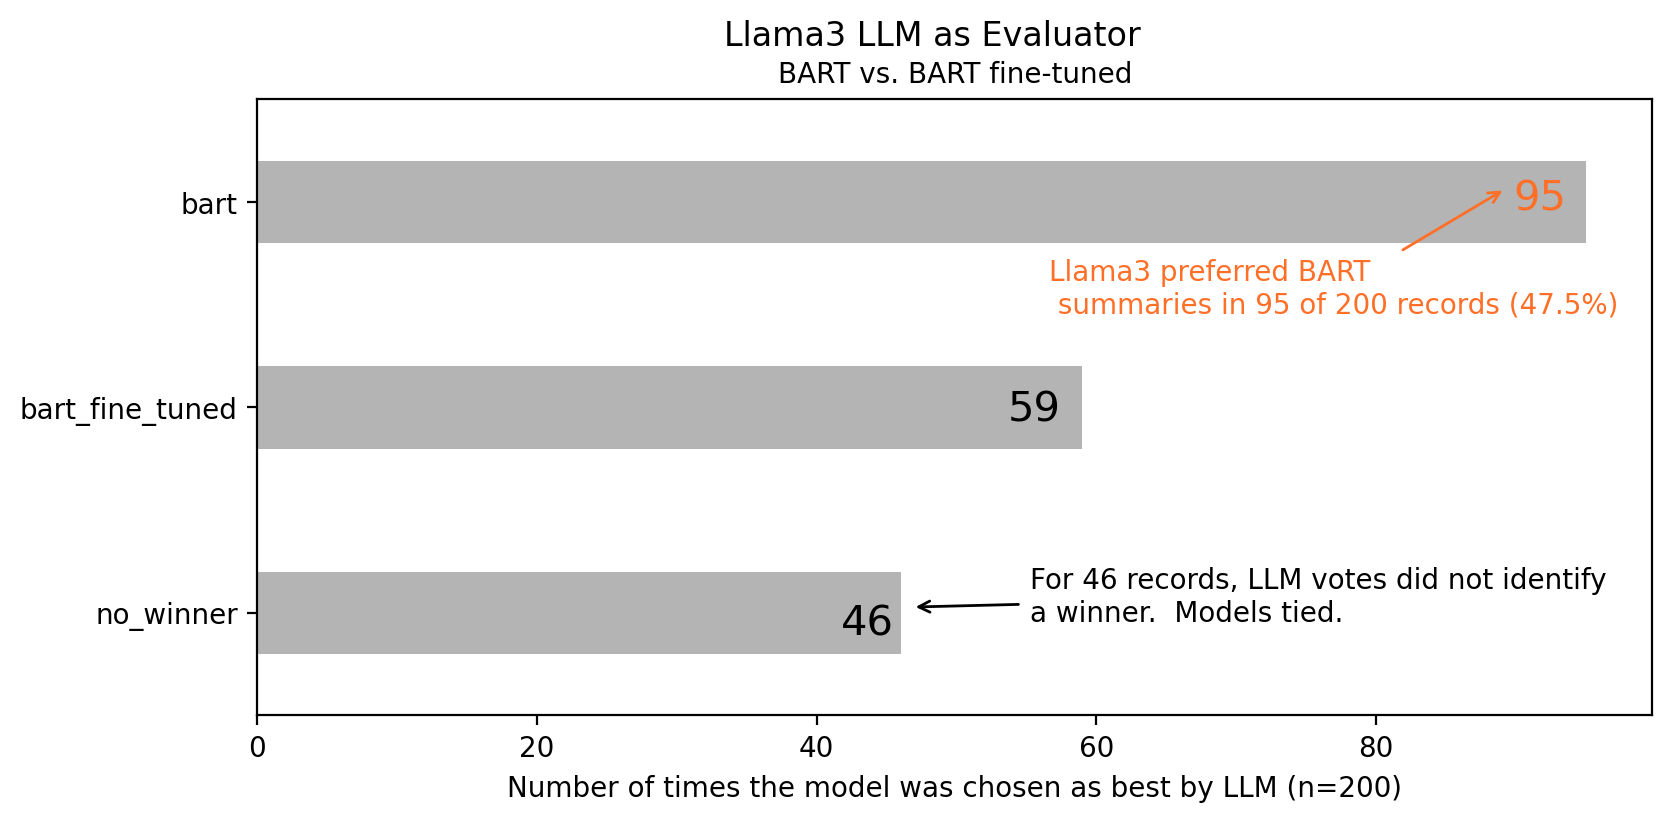

In [28]:
fig = plt.figure()

fig.patch.set_facecolor('white')
fig.patch.set_alpha(0)
fig = plt.figure(figsize=(9,4),linewidth=10, facecolor='white')

plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams
plt.style.context('seaborn-paper')

colors = sns.color_palette(['#B4B4B4'])
sns.barplot(data=df_bart_results,y=df_bart_results['model'],x=df_bart_results['value'], palette = colors,width=0.4, dodge=False)
plt.xlabel('Number of times the model was chosen as best by LLM (n=200)')
plt.ylabel('')
plt.tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
#plt.tight_layout()
plt.legend('', frameon=False)
plt.suptitle('Llama3 LLM as Evaluator')
plt.title('BART vs. BART fine-tuned', fontsize=10)
#plt.grid(visible=True, axis='x', which='major' )
plt.annotate(text='95', xy=([400,400]), xycoords='axes points', xytext=(452,182), size=15, color='#FF6F27')
plt.annotate(text='59', xy=([500,500]), xycoords='axes points', xytext=(270,106), size=15)
plt.annotate(text='46', xy=([500,500]), xycoords='axes points', xytext=(210,29), size=15)
#plt.annotate(text='18', xy=([500,500]), xycoords='axes points', xytext=(60,31), size=15)
plt.annotate(text='For 46 records, LLM votes did not identify \na winner.  Models tied. ', xy=([235,39]), xycoords='axes points', xytext=(278, 34), 
            arrowprops=dict(arrowstyle='->,widthB=6.2',linewidth=1, connectionstyle='bar,fraction=0'));# textcoords=('axes fraction'), ,
#            arrowprops=dict(arrowstyle='-[,widthB=6.2',color='#FF6F27',linewidth=1, connectionstyle='bar,fraction=0'))
plt.annotate(text='Llama3 preferred BART\n summaries in 95 of 200 records (47.5%) ', xy=([450,190]), xycoords='axes points', xytext=(285, 145), color='#FF6F27',
            arrowprops=dict(arrowstyle='->,widthB=6.2',linewidth=1, color='#FF6F27', connectionstyle='bar,fraction=0'));# textcoords=('axes fraction'), ,
plt.savefig('data/llm_eval_bart_v_bart_fine_tuned.png', bbox_inches='tight');